In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [58]:
from fastai.vision import *
from fastai.callbacks.hooks import *
from fastai.utils.mem import *

from pathlib import Path
from functools import partial
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import re
import random
import torch

In [3]:
processed_dir = Path("/hpf/largeprojects/MICe/nwang/TissueVision/2019-05-31_Mallar_NeuralNet/processed")
images = sorted([raw_path for raw_path in processed_dir.ls() if "_image" in raw_path.as_posix()])

In [5]:
models_path = Path("/hpf/largeprojects/MICe/nwang/TissueVision/2019-05-31_Mallar_NeuralNet/models")

defaults.device = torch.device("cpu")
learn = load_learner(path = models_path, file = "2019-06-12_RESNET50_IOU0.42.pkl")

In [87]:
il = (ImageList.from_folder(processed_dir)
      .filter_by_func(lambda fname:'image' in Path(fname).name)
      .filter_by_func(lambda fname:'1.2_Z0080_R_image_i6_j3.tif' in Path(fname).name)
      .normalize(imagenet_stats)
     )

AttributeError: 'ImageList' object has no attribute 'normalize'

In [34]:
print(il)
print(type(il[0]))
print(il[0])

ImageList (1 items)
Image (3, 224, 224)
Path: /hpf/largeprojects/MICe/nwang/TissueVision/2019-05-31_Mallar_NeuralNet/processed
<class 'fastai.vision.image.Image'>
Image (3, 224, 224)


In [37]:
prediction = learn.predict(il[0])

In [41]:
print(prediction[0])
print(prediction[1])
print(prediction[2])

ImageSegment (1, 224, 224)
tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]]])
tensor([[[0.6899, 0.7231, 0.7518,  ..., 0.8336, 0.8282, 0.8178],
         [0.7059, 0.7345, 0.7779,  ..., 0.8194, 0.8094, 0.8162],
         [0.8006, 0.8014, 0.8281,  ..., 0.8894, 0.8506, 0.8352],
         ...,
         [0.6832, 0.7308, 0.7709,  ..., 0.9131, 0.8887, 0.8203],
         [0.6806, 0.7441, 0.7844,  ..., 0.9065, 0.8803, 0.8132],
         [0.6992, 0.7400, 0.7960,  ..., 0.8870, 0.8474, 0.7853]],

        [[0.3101, 0.2769, 0.2482,  ..., 0.1664, 0.1718, 0.1822],
         [0.2941, 0.2655, 0.2221,  ..., 0.1806, 0.1906, 0.1838],
         [0.1994, 0.1986, 0.1719,  ..., 0.1106, 0.1494, 0.1648],
         ...,
         [0.3168, 0.2692, 0.2291,  ..., 0.0869, 0.1113, 0.1797],
         [0.3194, 0.2559, 0.2156,  ..., 0.0935, 0.1197, 0.1868],
  

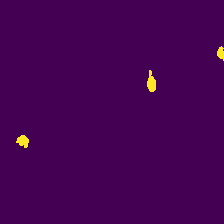

In [42]:
prediction[0]

In [62]:
image = cv.imread(images[0].as_posix(), cv.COLOR_BGR2GRAY)

In [67]:
image.shape

(224, 224)

In [78]:
image1 = torch.tensor(image, dtype=torch.float32).unsqueeze(0)
image3 = torch.cat((image1, image1, image1),0)
image3.shape
image_proper = Image(image3)

In [80]:
prediction = learn.predict(image_proper)